<a href="https://colab.research.google.com/github/seemasafar/nlp-in-python/blob/master/WORD2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from collections import defaultdict
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt


## Randomly initialise
getW1 = [[0.236, -0.962, 0.686, 0.785, -0.454, -0.833, -0.744, 0.677, -0.427, -0.066],
		[-0.907, 0.894, 0.225, 0.673, -0.579, -0.428, 0.685, 0.973, -0.070, -0.811],
		[-0.576, 0.658, -0.582, -0.112, 0.662, 0.051, -0.401, -0.921, -0.158, 0.529],
		[0.517, 0.436, 0.092, -0.835, -0.444, -0.905, 0.879, 0.303, 0.332, -0.275],
		[0.859, -0.890, 0.651, 0.185, -0.511, -0.456, 0.377, -0.274, 0.182, -0.237],
		[0.368, -0.867, -0.301, -0.222, 0.630, 0.808, 0.088, -0.902, -0.450, -0.408],
		[0.728, 0.277, 0.439, 0.138, -0.943, -0.409, 0.687, -0.215, -0.807, 0.612],
		[0.593, -0.699, 0.020, 0.142, -0.638, -0.633, 0.344, 0.868, 0.913, 0.429],
		[0.447, -0.810, -0.061, -0.495, 0.794, -0.064, -0.817, -0.408, -0.286, 0.149]]

getW2 = [[-0.868, -0.406, -0.288, -0.016, -0.560, 0.179, 0.099, 0.438, -0.551],
		[-0.395, 0.890, 0.685, -0.329, 0.218, -0.852, -0.919, 0.665, 0.968],
		[-0.128, 0.685, -0.828, 0.709, -0.420, 0.057, -0.212, 0.728, -0.690],
		[0.881, 0.238, 0.018, 0.622, 0.936, -0.442, 0.936, 0.586, -0.020],
		[-0.478, 0.240, 0.820, -0.731, 0.260, -0.989, -0.626, 0.796, -0.599],
		[0.679, 0.721, -0.111, 0.083, -0.738, 0.227, 0.560, 0.929, 0.017],
		[-0.690, 0.907, 0.464, -0.022, -0.005, -0.004, -0.425, 0.299, 0.757],
		[-0.054, 0.397, -0.017, -0.563, -0.551, 0.465, -0.596, -0.413, -0.395],
		[-0.838, 0.053, -0.160, -0.164, -0.671, 0.140, -0.149, 0.708, 0.425],
		[0.096, -0.995, -0.313, 0.881, -0.402, -0.631, -0.660, 0.184, 0.487]]

Find unique word counts using dictonary
THE WORD COUNTS ARE defaultdict(<class 'int'>, {'the': 2, 'real': 1, 'opportunity': 1, 'for': 1, 'success': 1, 'lies': 1, 'within': 1, 'person': 1, 'but': 1})
 trying to print self.words_list ['the', 'real', 'opportunity', 'for', 'success', 'lies', 'within', 'person', 'but']
The index of the corpus index are {'the': 0, 'real': 1, 'opportunity': 2, 'for': 3, 'success': 4, 'lies': 5, 'within': 6, 'person': 7, 'but': 8}
The index of words are  {0: 'the', 1: 'real', 2: 'opportunity', 3: 'for', 4: 'success', 5: 'lies', 6: 'within', 7: 'person', 8: 'but'}
The length of the sentence is 10
The training data is  []
The training data is  []
The training data is  []
Trying to append the real
The training data is  []
Trying to append the opportunity
The training data is  []
The training data is  [[[1, 0, 0, 0, 0, 0, 0, 0, 0], [[0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0]]]]
Trying to append real the
The training data is  [[[1, 0, 0, 0, 0, 0, 0, 0

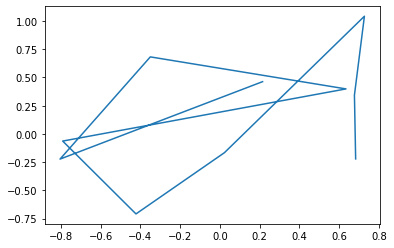

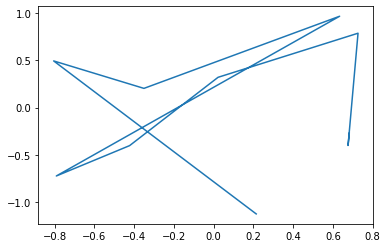

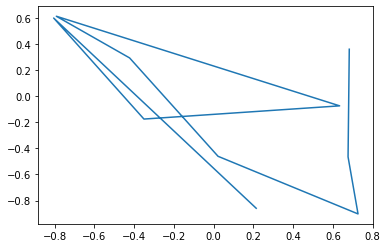

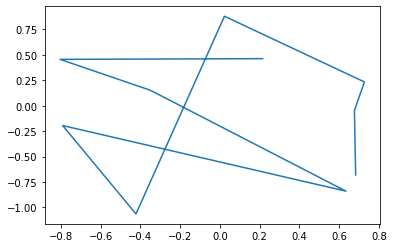

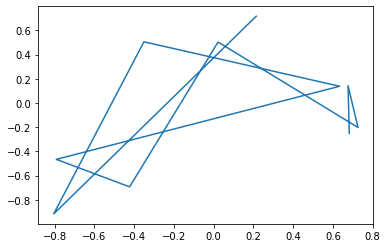

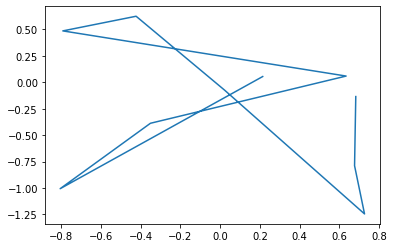

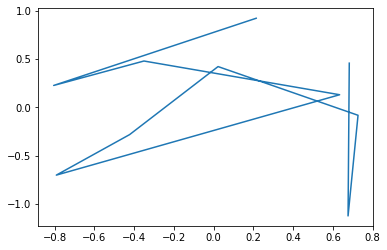

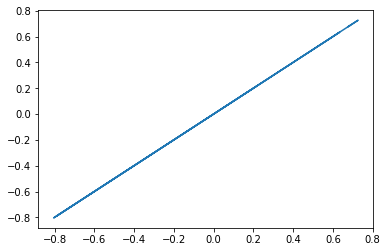

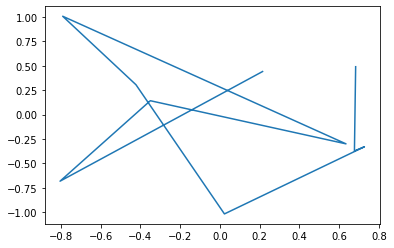

person 0.9999999999999999
the 0.4843687952135665
success 0.4080258911381475


In [31]:
class word2vec():

	def __init__(self):
		self.n = settings['n']
		self.lr = settings['learning_rate']
		self.epochs = settings['epochs']
		self.window = settings['window_size']

	def generate_training_data(self, settings, corpus):
		print('Find unique word counts using dictonary')
		word_counts = defaultdict(int)
		for row in corpus:
			for word in row:
				word_counts[word] += 1
		
		print("THE WORD COUNTS ARE",word_counts)		
  ###########################################																															
			
		
		## How many unique words in vocab? 9
		self.v_count = len(word_counts.keys())
		#########################
		# print(self.v_count)	#
		# 9						#
		#########################

		# Generate Lookup Dictionaries (vocab)
		self.words_list = list(word_counts.keys())
		#################################################################################################
		print(" trying to print self.words_list",self.words_list)																		
		# trying to print self.words_list ['i', 'will', 'love', 'the', 'light', 'for', 'it', 'shows', 'me']	#
		#################################################################################################
		
		# Generate word:index
		self.word_index = dict((word, i) for i, word in enumerate(self.words_list))
		#############################################################################################################################
		print("The index of the corpus index are",self.word_index)																									#
		# # The index of the corpus index are {'i': 0, 'will': 1, 'love': 2, 'the': 3, 'light': 4, 'for': 5, 'it': 6, 'shows': 7, 'me': 8}	#
		#############################################################################################################################

		# Generate index:word
		self.index_word = dict((i, word) for i, word in enumerate(self.words_list))
		#############################################################################################################################
		print("The index of words are " ,self.index_word)																									#
		# The index of words are  {0: 'i', 1: 'will', 2: 'love', 3: 'the', 4: 'light', 5: 'for', 6: 'it', 7: 'shows', 8: 'me'}	#
		#############################################################################################################################

		training_data = []

		# Cycle through each sentence in corpus
		for sentence in corpus:
			sent_len = len(sentence)

		print("The length of the sentence is",sent_len)

			# Cycle through each word in sentence
		for i, word in enumerate(sentence):
				# Convert target word to one-hot
				w_target = self.word2onehot(sentence[i])

				# Cycle through context window
				w_context = []

				# Note: window_size 2 will have range of 5 values
				for j in range(i - self.window, i + self.window+1):
					# Criteria for context word 
					# 1. Target word cannot be context word (j != i)
					# 2. Index must be greater or equal than 0 (j >= 0) - if not list index out of range
					# 3. Index must be less or equal than length of sentence (j <= sent_len-1) - if not list index out of range 
					if j != i and j <= sent_len-1 and j >= 0:
						# Append the one-hot representation of word to w_context
						w_context.append(self.word2onehot(sentence[j]))
						print("Trying to append", sentence[i], sentence[j]) 
						#########################
						# Example:				#
						#Trying to append i will
						#Trying to append i love
					
						#########################
						
				# training_data contains a one-hot representation of the target word and context words
				#################################################################################################
				# Example:																						#
				# [Target] i, [Context] will, [Context] love									#
					print("The training data is ", training_data)																			#
				# [[[1, 0, 0, 0, 0, 0, 0, 0, 0], [[0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0]]]]	#
				#################################################################################################
				training_data.append([w_target, w_context])

		return np.array(training_data)

	def word2onehot(self, word):
		# word_vec - initialise a blank vector
		word_vec = [0 for i in range(0, self.v_count)] # Alternative - np.zeros(self.v_count)
		#############################
	#	print("The output of word_vec")
	#	print(word_vec)
		# [0, 0, 0, 0, 0, 0, 0, 0]	#
		#############################

		# Get ID of word from word_index
		word_index = self.word_index[word]

		# Change value from 0 to 1 according to ID of the word
		word_vec[word_index] = 1

		return word_vec

	def train(self, training_data):
		# Initialising weight matrices
		# np.random.uniform(HIGH, LOW, OUTPUT_SHAPE)
		# https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.uniform.html
		self.w1 = np.array(getW1)
		self.w2 = np.array(getW2)
		# self.w1 = np.random.uniform(-1, 1, (self.v_count, self.n))
		# self.w2 = np.random.uniform(-1, 1, (self.n, self.v_count))
		
		# Cycle through each epoch
		for i in range(self.epochs):
			# Intialise loss to 0
			self.loss = 0
			# Cycle through each training sample
			# w_t = vector for target word, w_c = vectors for context words
			for w_t, w_c in training_data:
				# Forward pass
				# 1. predicted y using softmax (y_pred) 2. matrix of hidden layer (h) 3. output layer before softmax (u)
				y_pred, h, u = self.forward_pass(w_t)
				#########################################
				# print("Vector for target word:", w_t)	#
				# print("W1-before backprop", self.w1)	#
				# print("W2-before backprop", self.w2)	#
				#########################################

				# Calculate error
				# 1. For a target word, calculate difference between y_pred and each of the context words
				# 2. Sum up the differences using np.sum to give us the error for this particular target word
				EI = np.sum([np.subtract(y_pred, word) for word in w_c], axis=0)
				#########################
				# print("Error", EI)	#
				#########################

				# Backpropagation
				# We use SGD to backpropagate errors - calculate loss on the output layer 
				self.backprop(EI, h, w_t)
				#########################################
				#print("W1-after backprop", self.w1)	#
				#print("W2-after backprop", self.w2)	#
				#########################################

				# Calculate loss
				# There are 2 parts to the loss function
				# Part 1: -ve sum of all the output +
				# Part 2: length of context words * log of sum for all elements (exponential-ed) in the output layer before softmax (u)
				# Note: word.index(1) returns the index in the context word vector with value 1
				# Note: u[word.index(1)] returns the value of the output layer before softmax
				self.loss += -np.sum([u[word.index(1)] for word in w_c]) + len(w_c) * np.log(np.sum(np.exp(u)))
			 #	plt.plot(self.loss)
				#plt.show()
				#############################################################
				# Break if you want to see weights after first target word 	#
				# break 													#
				#############################################################
			print('Epoch:', i, "Loss:", self.loss)

	def forward_pass(self, x):
		# x is one-hot vector for target word, shape - 9x1
		# Run through first matrix (w1) to get hidden layer - 10x9 dot 9x1 gives us 10x1
		h = np.dot(x, self.w1)
		# Dot product hidden layer with second matrix (w2) - 9x10 dot 10x1 gives us 9x1
		u = np.dot(h, self.w2)
		# Run 1x9 through softmax to force each element to range of [0, 1] - 1x8
		y_c = self.softmax(u)
		return y_c, h, u

	def softmax(self, x):
		e_x = np.exp(x - np.max(x))
		return e_x / e_x.sum(axis=0)

	def backprop(self, e, h, x):
		# https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.outer.html
		# Column vector EI represents row-wise sum of prediction errors across each context word for the current center word
		# Going backwards, we need to take derivative of E with respect of w2
		# h - shape 10x1, e - shape 9x1, dl_dw2 - shape 10x9
		# x - shape 9x1, w2 - 10x9, e.T - 9x1
		dl_dw2 = np.outer(h, e)
		dl_dw1 = np.outer(x, np.dot(self.w2, e.T))
		########################################
		# print('Delta for w2', dl_dw2)			#
		# print('Hidden layer', h)				#
		# print('np.dot', np.dot(self.w2, e.T))	#
		# print('Delta for w1', dl_dw1)			#
		#########################################

		# Update weights
		self.w1 = self.w1 - (self.lr * dl_dw1)
		self.w2 = self.w2 - (self.lr * dl_dw2)

	# Get vector from word
	def word_vec(self, word):
		w_index = self.word_index[word]
		v_w = self.w1[w_index]
		return v_w

	# Input vector, returns nearest word(s)
	def vec_sim(self, word, top_n):
		v_w1 = self.word_vec(word)
		word_sim = {}

		for i in range(self.v_count):
			# Find the similary score for each word in vocab
			v_w2 = self.w1[i]
			theta_sum = np.dot(v_w1, v_w2)
			theta_den = np.linalg.norm(v_w1) * np.linalg.norm(v_w2)
			theta = theta_sum / theta_den
			plt.plot(v_w1,v_w2)
			plt.show()
			word = self.index_word[i]
			word_sim[word] = theta
			

		words_sorted = sorted(word_sim.items(), key=lambda kv: kv[1], reverse=True)

		for word, sim in words_sorted[:top_n]:
			print(word, sim)

#####################################################################
settings = {
	'window_size': 2,			# context window +- center word
	'n': 10,					# dimensions of word embeddings, also refer to size of hidden layer
	'epochs': 50,				# number of training epochs
	'learning_rate': 0.01		# learning rate
}

text = "The real opportunity for success lies within the person but"


# Note the .lower() as upper and lowercase does not matter in our implementation
# [['natural', 'language', 'processing', 'and', 'machine', 'learning', 'is', 'fun', 'and', 'exciting']]
corpus = [[word.lower() for word in text.split()]]

# Initialise object
w2v = word2vec()

# Numpy ndarray with one-hot representation for [target_word, context_words]
training_data = w2v.generate_training_data(settings, corpus)
#pl= np.array(training_data)
#plt.plot(pl)
#plt.show()
# Training
w2v.train(training_data)

# Get vector for word
word = "person"
vec = w2v.word_vec(word)
print("The vector value of" , word)
print("is" , vec)
##print(word, vec)

# Find similar words
print("Three similar words of",word)
print("is")
w2v.vec_sim("person", 3)


    


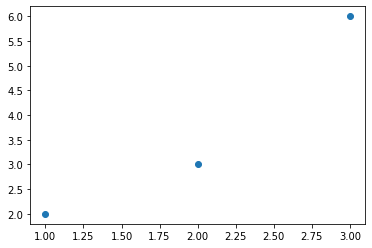

In [16]:
import numpy as np
from matplotlib import pyplot as plt

data = np.array([
    [1, 2],
    [2, 3],
    [3, 6],
])
x, y = data.T
plt.scatter(x,y)
plt.show()

In [0]:
#TRYING TO PLOT 
rom gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
            ['this', 'is', 'the', 'second', 'sentence'],
            ['yet', 'another', 'sentence'],
            ['one', 'more', 'sentence'],
            ['and', 'the', 'final', 'sentence']]
# train model
model_1 = Word2Vec(sentences, size=300, min_count=1)

# fit a 2d PCA model to the vectors
X = model_1[model_1.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model_1.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


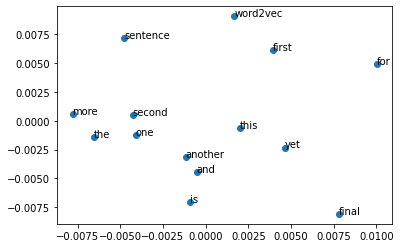

In [0]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
            ['this', 'is', 'the', 'second', 'sentence'],
            ['yet', 'another', 'sentence'],
            ['one', 'more', 'sentence'],
            ['and', 'the', 'final', 'sentence']]
# train model
model_1 = Word2Vec(sentences, size=300, min_count=1)

# fit a 2d PCA model to the vectors
X = model_1[model_1.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model_1.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()